In [1]:
import SCEA
import SCEA2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc


In [3]:
def test1data():
    # Lets generate test points
    meshgrid = np.meshgrid(np.linspace(-10,10,42), np.linspace(-2,18,42))
    test_lon = meshgrid[0].flatten()
    test_lat = meshgrid[1].flatten()
    test_no2 = np.cos(test_lon/2)+np.sin(test_lat/4) - np.abs(test_lon)*0.2 + np.random.normal(0,0.6,len(test_lon))
    return test_lon,test_lat,test_no2

test_lon,test_lat,test_no2 = test1data()

#plt.scatter(test_lon,test_lat, c=test_no2)
#plt.title("test1")
#plt.colorbar()
#plt.show()

def test15data():
    # Lets generate test points
    meshgrid = np.meshgrid(np.linspace(-10,10,42), np.linspace(-2,18,42))
    test_lon = meshgrid[0].flatten()
    test_lat = meshgrid[1].flatten()
    test_no2 = np.cos(test_lon/2)+np.sin(test_lat/4) - np.abs(test_lon)*0.2 #+ np.random.normal(0,0.6,len(test_lon))
    return test_lon,test_lat,test_no2

test_lon,test_lat,test_no2 = test15data()

#plt.scatter(test_lon,test_lat, c=test_no2)
#plt.title("test1.5")
#plt.colorbar()
#plt.show()

def test2data():
    # Lets generate harder test points
    meshgrid = np.meshgrid(np.linspace(-25,35,35), np.linspace(-10,45,70))
    test2_lon = meshgrid[0].flatten()
    test2_lat = meshgrid[1].flatten()
    test2_no2 = (np.sin(test2_lon/3)+np.sin(test2_lat/4))/(0.05*np.abs(test2_lon)+1) + np.random.normal(0,0.6,len(test2_lon)) 

    # Remove 20% of the points randomly
    points_to_remove = np.random.choice(len(test2_no2), int(len(test2_no2)*0.2), replace=False)
    test2_lon = np.delete(test2_lon, points_to_remove)
    test2_lat = np.delete(test2_lat, points_to_remove)
    test2_no2 = np.delete(test2_no2, points_to_remove)
    return test2_lon,test2_lat,test2_no2

test2_lon,test2_lat,test2_no2 = test2data()

#plt.scatter(test2_lon,test2_lat, c=test2_no2, s=15)
#plt.title("test data2")
#plt.colorbar()
#plt.show()

def test25data():
    # Lets generate harder test points
    meshgrid = np.meshgrid(np.linspace(-25,35,70), np.linspace(-10,45,70))
    test2_lon = meshgrid[0].flatten()
    test2_lat = meshgrid[1].flatten()
    test2_no2 = (np.sin(test2_lon/3)+np.sin(test2_lat/4))/(0.05*np.abs(test2_lon)+1) #+ np.random.normal(0,0.6,len(test2_lon)) 

    # Remove 20% of the points randomly
    #points_to_remove = np.random.choice(len(test2_no2), int(len(test2_no2)*0.2), replace=False)
    #test2_lon = np.delete(test2_lon, points_to_remove)
    #test2_lat = np.delete(test2_lat, points_to_remove)
    #test2_no2 = np.delete(test2_no2, points_to_remove)
    return test2_lon,test2_lat,test2_no2

test2_lon,test2_lat,test2_no2 = test25data()

#plt.scatter(test2_lon,test2_lat, c=test2_no2, s=15)
#plt.title("test data2")
#plt.colorbar()
#plt.show()

def test3data():
    # Lets generate harder test points
    meshgrid = np.meshgrid(np.linspace(-25,35,40), np.linspace(-10,45,80))
    test3_lon = meshgrid[0].flatten()
    test3_lat = meshgrid[1].flatten()
    test3_no2 = (np.sin(test3_lon/3)+np.sin(test3_lat/4))/(0.05*np.abs(test3_lon)+1) + np.random.normal(0,0.5,len(test3_lon))**4

    # Remove 20% of the points randomly
    points_to_remove = np.random.choice(len(test3_no2), int(len(test3_no2)*0.2), replace=False)
    test3_lon = np.delete(test3_lon, points_to_remove)
    test3_lat = np.delete(test3_lat, points_to_remove)
    test3_no2 = np.delete(test3_no2, points_to_remove)
    return test3_lon,test3_lat,test3_no2

test3_lon,test3_lat,test3_no2 = test3data()

#plt.scatter(test3_lon,test3_lat, c=test3_no2, s=15)
#plt.title("test data3")
#plt.colorbar()
#plt.show()

def test4data():
    # Lets generate harder test points
    meshgrid = np.meshgrid(np.linspace(-18,18,55), np.linspace(-18,18,70))
    test4_lon = meshgrid[0].flatten()
    test4_lat = meshgrid[1].flatten()
    test4_no2 = -0.01*test4_lon**4 + 1.3*test4_lon**2 + 12*test4_lon + 100 - 6*test4_lat**2 + 80
    test4_no2[test4_no2<0] = 0
    test4_no2 = test4_no2 + np.random.normal(0,80,len(test4_no2))

    # Remove points in the shape of an ellipse
    a,b = 1,15
    centre = [7,-1] 
    ellipse_equation = ((test4_lon-centre[0])**2/a**2 + (test4_lat-centre[1])**2/b**2)>1
    test4_lon = test4_lon[ellipse_equation]
    test4_lat = test4_lat[ellipse_equation]
    test4_no2 = test4_no2[ellipse_equation]
    return test4_lon,test4_lat,test4_no2

test4_lon,test4_lat,test4_no2 = test4data()

#plt.scatter(test4_lon,test4_lat, c=test4_no2, s=12)
#plt.title("test data4")
#plt.colorbar()
#plt.show()

def test5data():
    from sklearn import datasets
    moons = np.transpose(datasets.make_moons(n_samples=70, noise=0.04)[0])

    meshgrid = np.meshgrid(np.linspace(-2,3,55), np.linspace(-1.5,2,70))
    test5_lon = meshgrid[0].flatten()
    test5_lat = meshgrid[1].flatten()
    test5_no2 = np.ones(len(test5_lon)) 

    for i in range(len(moons[0])):
        test5_no2[np.sqrt((test5_lon-moons[0][i])**2+(test5_lat-moons[1][i])**2)<0.1] = 2
            
    test5_no2 = test5_no2 + np.random.normal(0,0.4,len(test5_no2))
    return test5_lon,test5_lat,test5_no2

test5_lon,test5_lat,test5_no2 = test5data()

#plt.scatter(test5_lon,test5_lat, c=test5_no2)
#plt.colorbar()
#plt.title("test data5")

Found  1  clusters
Found  1  clusters
Found  6  clusters
Found  6  clusters


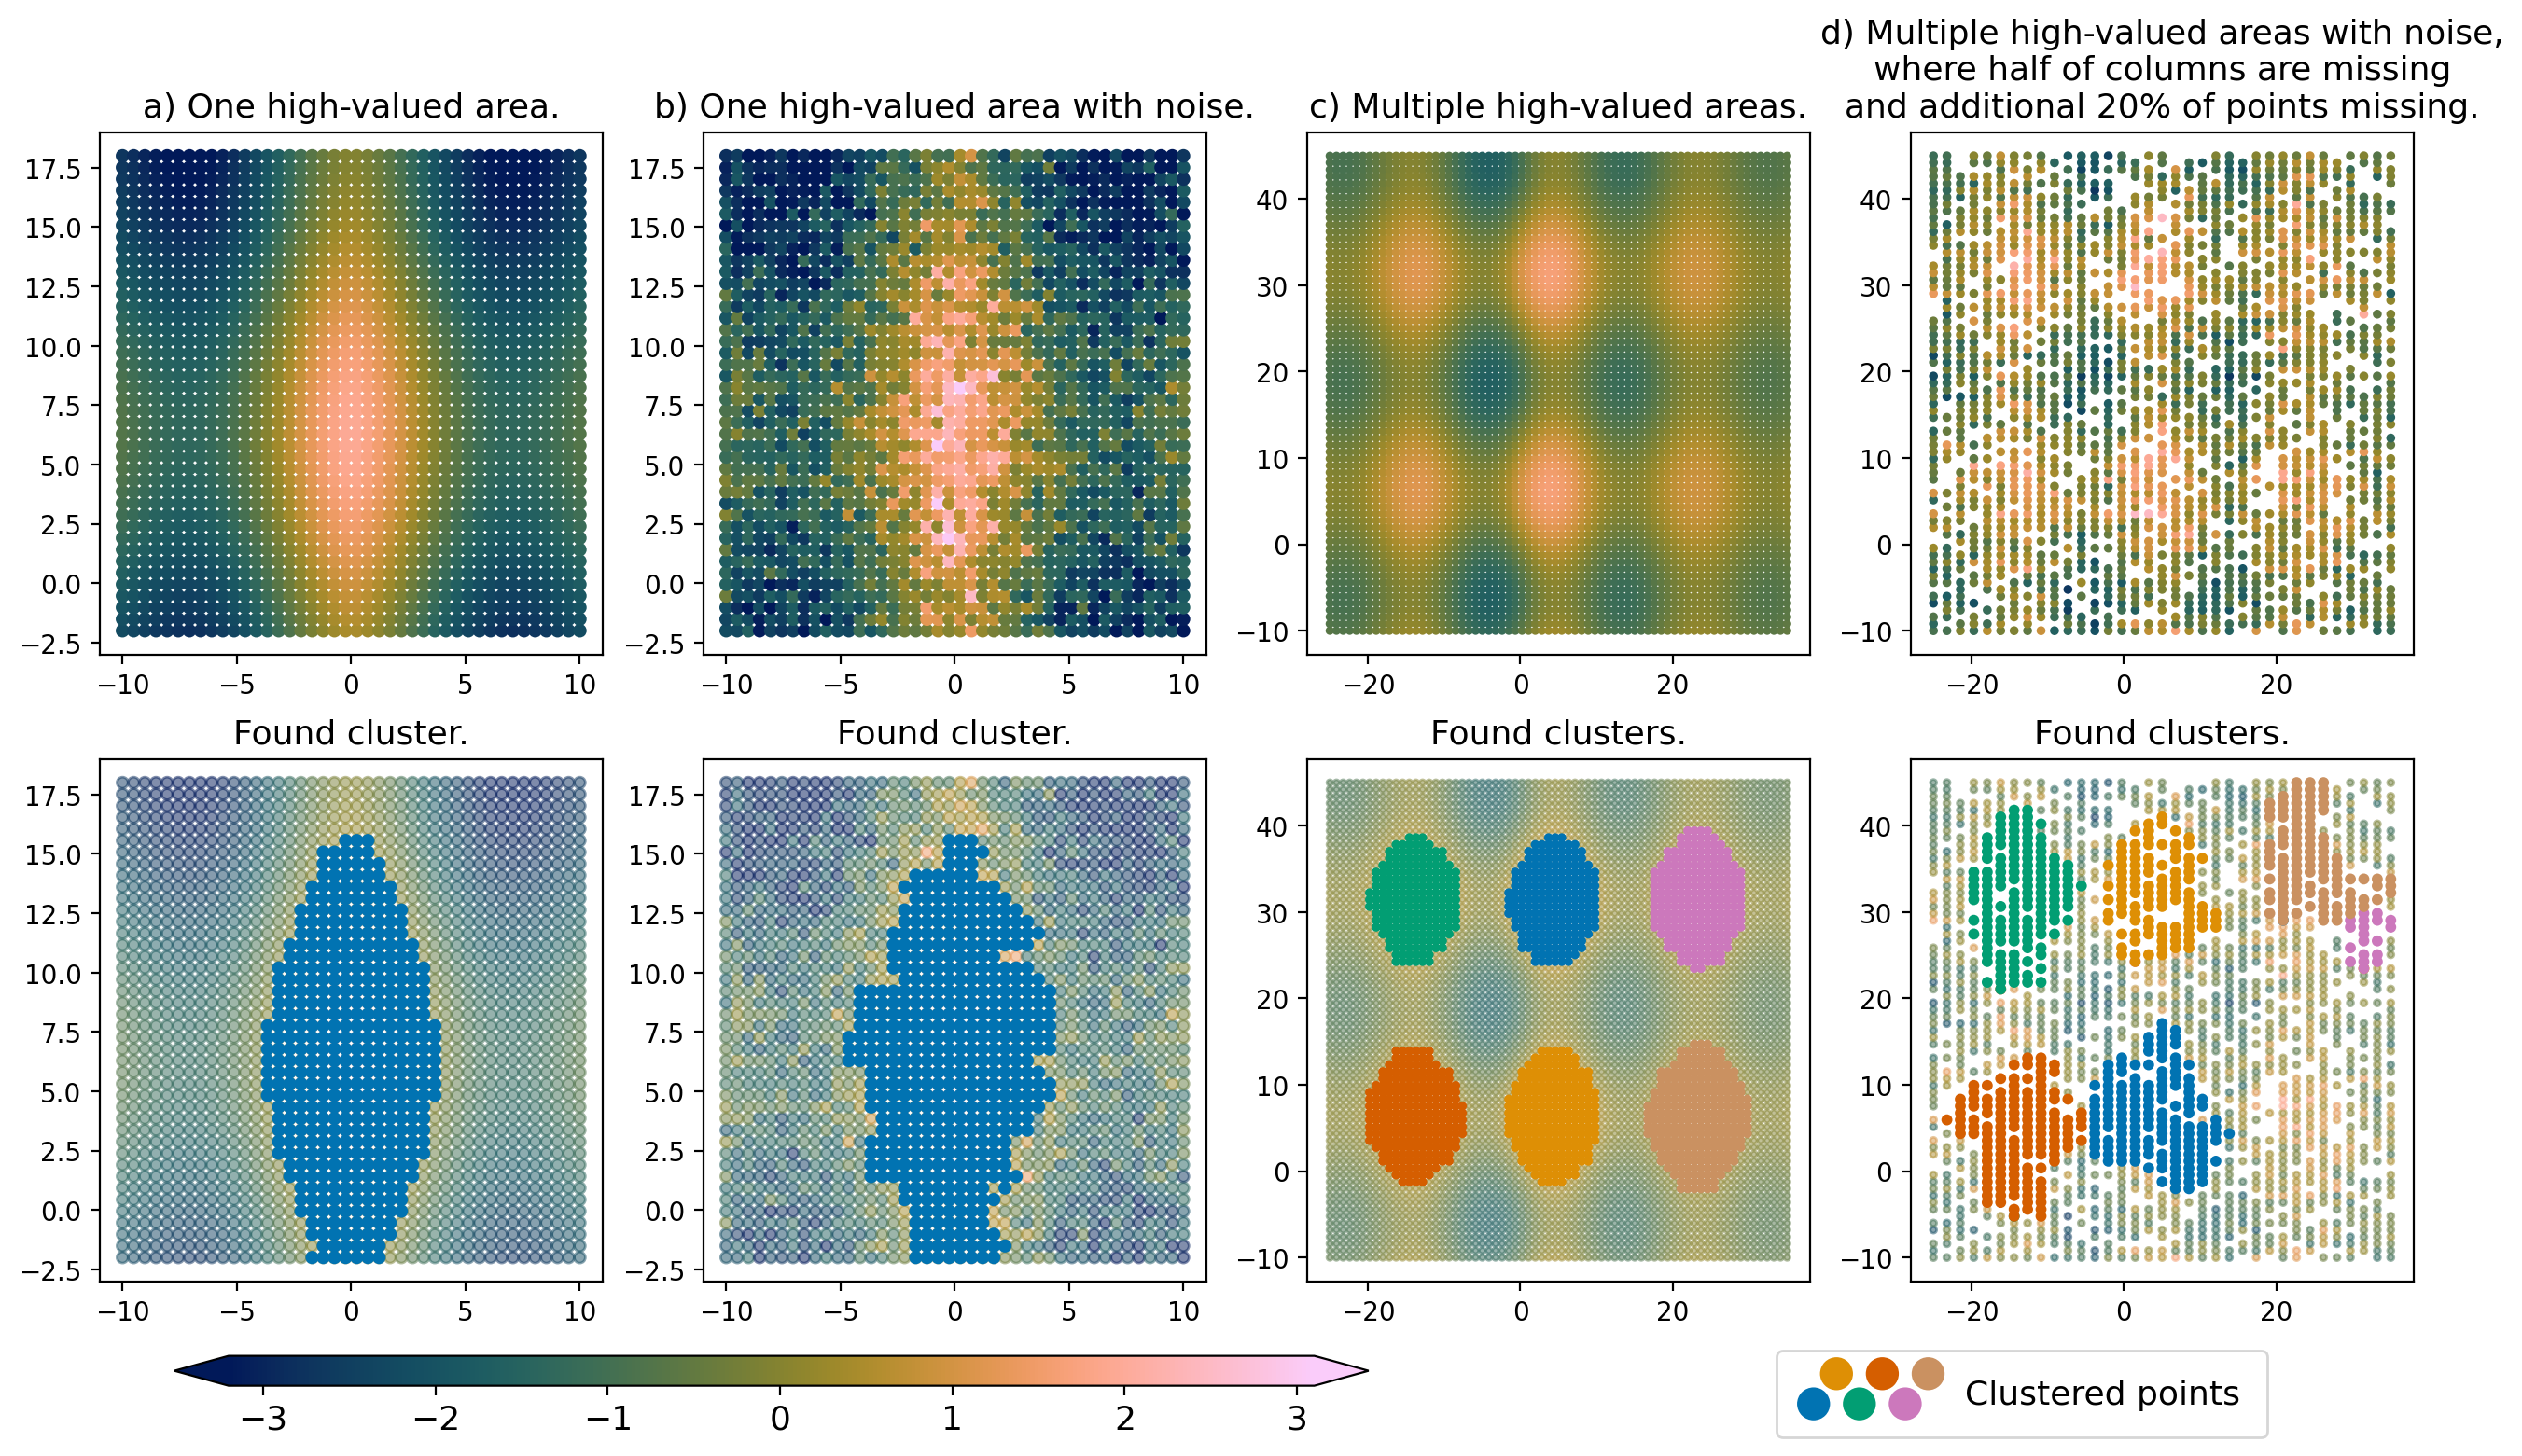

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
colorblind_palette = sns.color_palette("colorblind")

test_lon,test_lat,test_no2 = test1data()
test15_lon,test15_lat,test15_no2 = test15data()
test2_lon,test2_lat,test2_no2 = test2data()
test25_lon,test25_lat,test25_no2 = test25data()


# Clusterings
clt1 = SCEA.scea(np.transpose([test_lon, test_lat]), test_no2, stds=2.2, radius_func_sigmas_threshold=1, local_box_size=0)
clt15 = SCEA.scea(np.transpose([test15_lon, test15_lat]), test15_no2, stds=2, radius_func_sigmas_threshold=1, local_box_size=0)
clt2 = SCEA.scea(np.transpose([test2_lon, test2_lat]), test2_no2, stds=2.3, radius_func_sigmas_threshold=1.2, local_box_size=0)
clt25 = SCEA.scea(np.transpose([test25_lon, test25_lat]), test25_no2, stds=1.5, radius_func_sigmas_threshold=1.2, local_box_size=0)


# Plottings

vmin=-3.2
vmax=3.1
fontsize=13
s=18

scatters = []

fig, axs = plt.subplots(2,4, figsize=(16,8), dpi=200)

ax = axs[0,0]
ax.scatter(test15_lon, test15_lat, c=test15_no2, cmap=cmc.batlow, vmin=vmin, vmax=vmax, s=s)
ax.set_title("a) One high-valued area.",fontsize=fontsize)

ax = axs[1,0]
ax.scatter(test15_lon, test15_lat, c=test15_no2, alpha=0.5, cmap=cmc.batlow, vmin=vmin, vmax=vmax, s=s)
ax.set_title("Found cluster.",fontsize=fontsize)
for i in np.unique(clt1):
    if i==0: continue
    ax.scatter(test15_lon[clt15==i], test15_lat[clt15==i],c=[colorblind_palette[0]]*len(test15_lat[clt15==i]), alpha=1, edgecolors='none', s=26)


ax = axs[0,1]
pcm = ax.scatter(test_lon, test_lat, c=test_no2, cmap=cmc.batlow, vmin=vmin, vmax=vmax, s=s)
ax.set_title("b) One high-valued area with noise.",fontsize=fontsize)

ax = axs[1,1]
ax.scatter(test_lon, test_lat, c=test_no2, alpha=0.5, cmap=cmc.batlow, vmin=vmin, vmax=vmax, s=s)
ax.set_title("Found cluster.",fontsize=fontsize)
for i in np.unique(clt1):
    if i==0: continue
    ax.scatter(test_lon[clt1==i], test_lat[clt1==i],c=[colorblind_palette[0]]*len(test_lat[clt1==i]), alpha=1, edgecolors='none', s=26)


ax = axs[0,2]
pcm = ax.scatter(test25_lon, test25_lat, c=test25_no2, cmap=cmc.batlow, s=5,vmin=vmin, vmax=vmax)
ax.set_title("c) Multiple high-valued areas.",fontsize=fontsize)

ax = axs[1,2]
ax.scatter(test25_lon, test25_lat, c=test25_no2, alpha=0.5, cmap=cmc.batlow,s=5, vmin=vmin, vmax=vmax)
ax.set_title("Found clusters.",fontsize=fontsize)
cluster_points_lon = []
cluster_points_lat = []
colours = []
for i in np.unique(clt25):
    i=int(i)
    if i==0: continue
    cluster_points_lon.extend(test25_lon[clt25==i])
    cluster_points_lat.extend(test25_lat[clt25==i])
    colours.extend([colorblind_palette[i-1]]*len(test25_lon[clt25==i]))

ax.scatter(cluster_points_lon, cluster_points_lat, alpha=1, edgecolors='none', s=12, label="Clustered points", c=colours)


ax = axs[0,3]
pcm = ax.scatter(test2_lon, test2_lat, c=test2_no2, cmap=cmc.batlow, s=6,vmin=vmin, vmax=vmax)
ax.set_title("d) Multiple high-valued areas with noise,\nwhere half of columns are missing\nand additional 20% of points missing.",fontsize=fontsize)

ax = axs[1,3]
ax.scatter(test2_lon, test2_lat, c=test2_no2, alpha=0.5, cmap=cmc.batlow,s=6, vmin=vmin, vmax=vmax)
ax.set_title("Found clusters.",fontsize=fontsize)

cluster_points_lon = []
cluster_points_lat = []
colours = []
for i in np.unique(clt2):
    i=int(i)
    if i==0: continue
    cluster_points_lon.extend(test2_lon[clt2==i])
    cluster_points_lat.extend(test2_lat[clt2==i])
    colours.extend([colorblind_palette[i-1]]*len(test2_lon[clt2==i]))
    # Add one point to the beginning of the list to get it properly in Legend
    cluster_points_lon.insert(0,test2_lon[clt2==i][0])
    cluster_points_lat.insert(0,test2_lat[clt2==i][0])
    colours.insert(i-1,colorblind_palette[i-1])

    
ax.scatter(cluster_points_lon, cluster_points_lat, alpha=1, edgecolors='none', s=18, label="Clustered points", c=colours)

# Legend
plt.legend(bbox_to_anchor=(-0.3, -0.1),loc='upper left', fontsize=fontsize, labelspacing=1.3, markerscale=3, handlelength=4,handleheight=1,borderpad=0.8,scatterpoints=6, scatteryoffsets=[0,1,0,1,0,1,0])


# Colorbar
cax = fig.add_axes([0.15, 0.04, 0.4, 0.02])
cbar = fig.colorbar(pcm, cax=cax, shrink=1, extend='both', orientation='horizontal')
cbar.ax.tick_params(labelsize=fontsize)  # Set fontsize to 10


# Save the figure in vector graphics format
#save_path = os.path.join(plots_save_path, 'toy_data1.pdf')
#plt.savefig(save_path, format='pdf', bbox_inches='tight', transparent=True, ) 

plt.show()


# =============================================================================



Found  1  clusters
Found  1  clusters
Found  7  clusters
Found  6  clusters


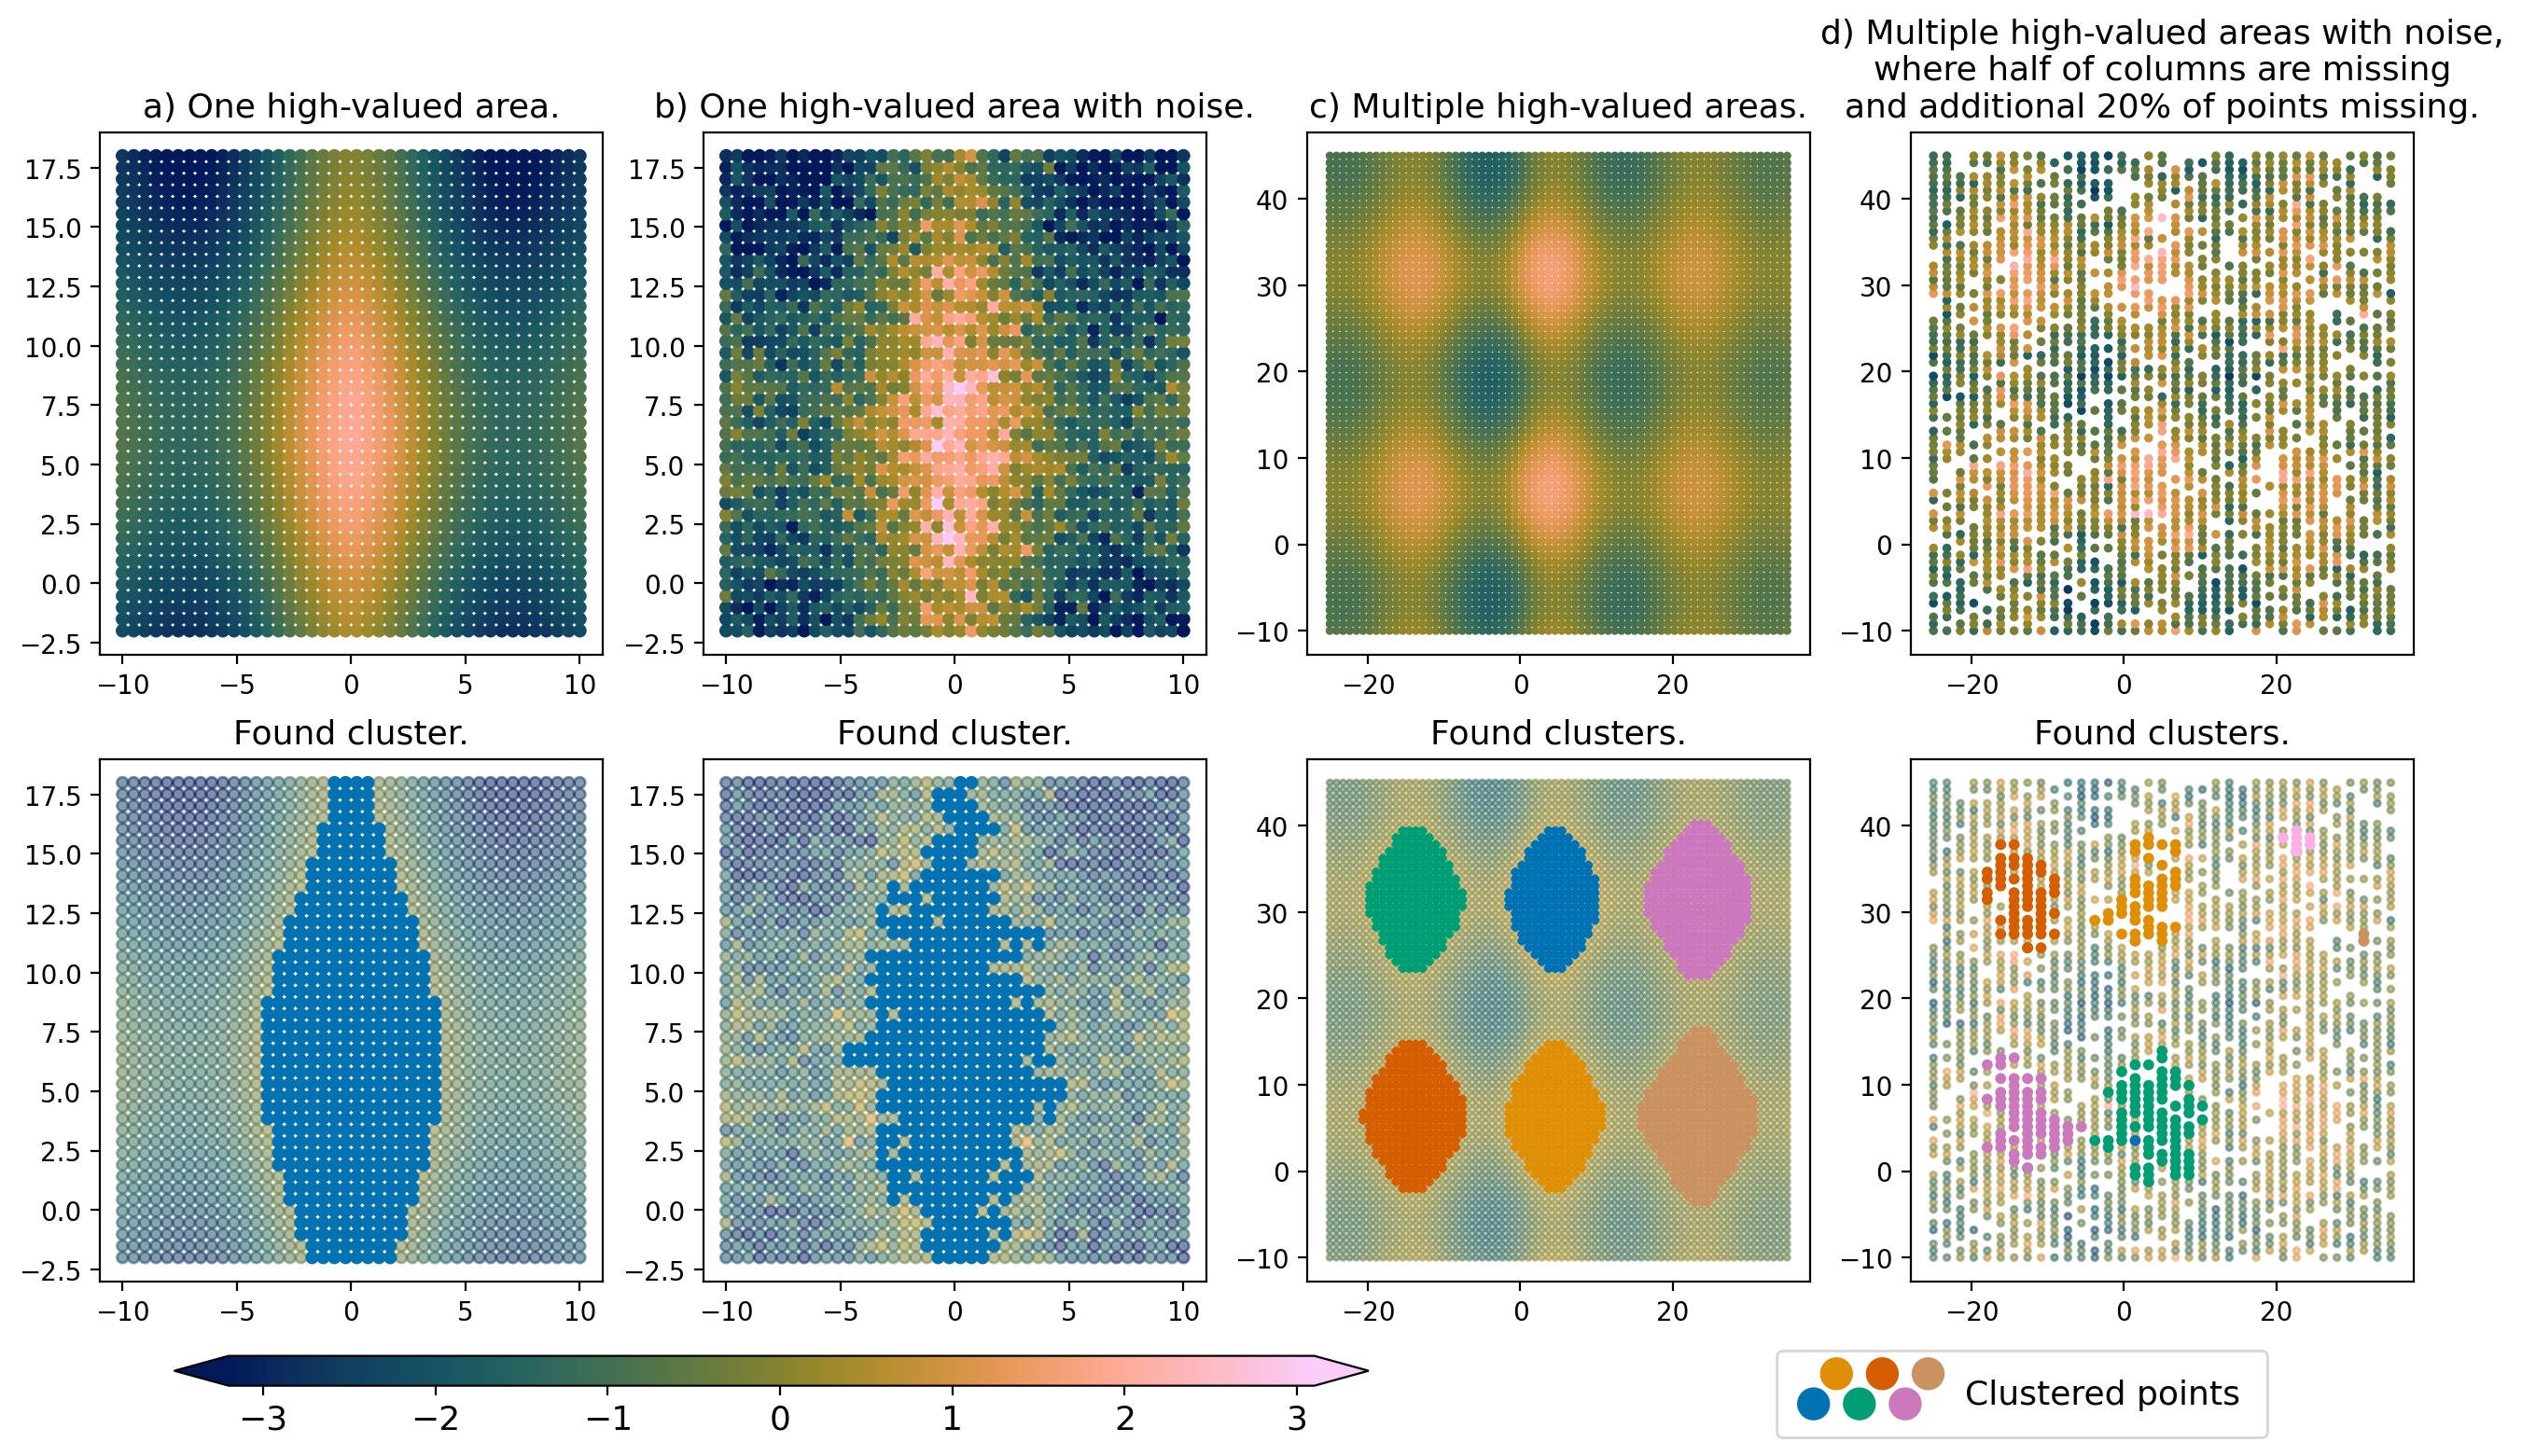

In [48]:
# Clusterings
clt1 = SCEA2.scea2(np.transpose([test_lon, test_lat]), test_no2, stds=2.2, radius_func_sigmas_threshold=0.6, local_box_size=0,)
clt15 = SCEA2.scea2(np.transpose([test15_lon, test15_lat]), test15_no2, stds=2, radius_func_sigmas_threshold=0.6, local_box_size=0)
clt2 = SCEA2.scea2(np.transpose([test2_lon, test2_lat]), test2_no2, stds=2.3, radius_func_sigmas_threshold=0.8, local_box_size=0, max_points_in_start_radius=15)
clt25 = SCEA2.scea2(np.transpose([test25_lon, test25_lat]), test25_no2, stds=1.5, radius_func_sigmas_threshold=0.8, local_box_size=0)


# Plottings

vmin=-3.2
vmax=3.1
fontsize=13
s=18

scatters = []

fig, axs = plt.subplots(2,4, figsize=(16,8), dpi=200)

ax = axs[0,0]
ax.scatter(test15_lon, test15_lat, c=test15_no2, cmap=cmc.batlow, vmin=vmin, vmax=vmax, s=s)
ax.set_title("a) One high-valued area.",fontsize=fontsize)

ax = axs[1,0]
ax.scatter(test15_lon, test15_lat, c=test15_no2, alpha=0.5, cmap=cmc.batlow, vmin=vmin, vmax=vmax, s=s)
ax.set_title("Found cluster.",fontsize=fontsize)
for i in np.unique(clt1):
    if i==0: continue
    ax.scatter(test15_lon[clt15==i], test15_lat[clt15==i],c=[colorblind_palette[0]]*len(test15_lat[clt15==i]), alpha=1, edgecolors='none', s=26)


ax = axs[0,1]
pcm = ax.scatter(test_lon, test_lat, c=test_no2, cmap=cmc.batlow, vmin=vmin, vmax=vmax, s=s)
ax.set_title("b) One high-valued area with noise.",fontsize=fontsize)

ax = axs[1,1]
ax.scatter(test_lon, test_lat, c=test_no2, alpha=0.5, cmap=cmc.batlow, vmin=vmin, vmax=vmax, s=s)
ax.set_title("Found cluster.",fontsize=fontsize)
for i in np.unique(clt1):
    if i==0: continue
    ax.scatter(test_lon[clt1==i], test_lat[clt1==i],c=[colorblind_palette[0]]*len(test_lat[clt1==i]), alpha=1, edgecolors='none', s=26)


ax = axs[0,2]
pcm = ax.scatter(test25_lon, test25_lat, c=test25_no2, cmap=cmc.batlow, s=5,vmin=vmin, vmax=vmax)
ax.set_title("c) Multiple high-valued areas.",fontsize=fontsize)

ax = axs[1,2]
ax.scatter(test25_lon, test25_lat, c=test25_no2, alpha=0.5, cmap=cmc.batlow,s=5, vmin=vmin, vmax=vmax)
ax.set_title("Found clusters.",fontsize=fontsize)
cluster_points_lon = []
cluster_points_lat = []
colours = []
for i in np.unique(clt25):
    i=int(i)
    if i==0: continue
    cluster_points_lon.extend(test25_lon[clt25==i])
    cluster_points_lat.extend(test25_lat[clt25==i])
    colours.extend([colorblind_palette[i-1]]*len(test25_lon[clt25==i]))

ax.scatter(cluster_points_lon, cluster_points_lat, alpha=1, edgecolors='none', s=12, label="Clustered points", c=colours)


ax = axs[0,3]
pcm = ax.scatter(test2_lon, test2_lat, c=test2_no2, cmap=cmc.batlow, s=6,vmin=vmin, vmax=vmax)
ax.set_title("d) Multiple high-valued areas with noise,\nwhere half of columns are missing\nand additional 20% of points missing.",fontsize=fontsize)

ax = axs[1,3]
ax.scatter(test2_lon, test2_lat, c=test2_no2, alpha=0.5, cmap=cmc.batlow,s=6, vmin=vmin, vmax=vmax)
ax.set_title("Found clusters.",fontsize=fontsize)

cluster_points_lon = []
cluster_points_lat = []
colours = []
for i in np.unique(clt2):
    i=int(i)
    if i==0: continue
    cluster_points_lon.extend(test2_lon[clt2==i])
    cluster_points_lat.extend(test2_lat[clt2==i])
    colours.extend([colorblind_palette[(i-1)%10]]*len(test2_lon[clt2==i]))
    # Add one point to the beginning of the list to get it properly in Legend
    cluster_points_lon.insert(0,test2_lon[clt2==i][0])
    cluster_points_lat.insert(0,test2_lat[clt2==i][0])
    colours.insert(i-1,colorblind_palette[(i-1)%10])

    
ax.scatter(cluster_points_lon, cluster_points_lat, alpha=1, edgecolors='none', s=18, label="Clustered points", c=colours)

# Legend
plt.legend(bbox_to_anchor=(-0.3, -0.1),loc='upper left', fontsize=fontsize, labelspacing=1.3, markerscale=3, handlelength=4,handleheight=1,borderpad=0.8,scatterpoints=6, scatteryoffsets=[0,1,0,1,0,1,0])


# Colorbar
cax = fig.add_axes([0.15, 0.04, 0.4, 0.02])
cbar = fig.colorbar(pcm, cax=cax, shrink=1, extend='both', orientation='horizontal')
cbar.ax.tick_params(labelsize=fontsize)  # Set fontsize to 10


# Save the figure in vector graphics format
#save_path = os.path.join(plots_save_path, 'toy_data1.pdf')
#plt.savefig(save_path, format='pdf', bbox_inches='tight', transparent=True, ) 

plt.show()

In [ ]:
def plot_s5p_cluster(i):
    date_of_clusters=datetime.utcfromtimestamp(clusters_timestamp[i]).strftime("%y%m%d")

    fig = plt.figure(figsize=(4,4))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=12))
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, alpha=0.5)
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    extent = 5
    ax.set_extent([clusters_lon_max[i]+extent,clusters_lon_min[i]-extent, clusters_lat_max[i]+extent,clusters_lat_min[i]-extent])

    s5p_timeframe = np.logical_and(clusters_timestamp[i]+60*3 > s5p_timestamp, s5p_timestamp > clusters_timestamp[i]-60*3)
    plt.scatter(s5p_lon[s5p_timeframe], s5p_lat[s5p_timeframe], c=s5p_no2[s5p_timeframe], transform=ccrs.Geodetic(), s=2, vmin=0, vmax=0.0001, alpha=0.7, cmap=cm.batlow)

    plt.scatter([clusters_lon_max[i], clusters_lon_min[i]], [clusters_lat_max[i], clusters_lat_min[i]], c='r', transform=ccrs.Geodetic(), s=50, edgecolors='none')

    #plt.title("SP5 and OCO-2 colocation with time difference: %f h" %(time_difference[good_i]/(60*60)) +"\nOn date: "+str(datetime.utcfromtimestamp(clusters_timestamp[i]).strftime("%y%m%d")))

    plt.show()
    
i=222
date_of_clusters=datetime.utcfromtimestamp(clusters_timestamp[i]).strftime("%y%m%d")
s5p_timeframe = np.logical_and(clusters_timestamp[i]+60*3 > s5p_timestamp, s5p_timestamp > clusters_timestamp[i]-60*3)

fig = plt.figure(figsize=(8,5),dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, zorder=-1)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=0.5,
    color="gray",
    alpha=0.3,
    linestyle="--",
)
gl.xlabel_style = {"size": 10, "color": "gray"}
gl.ylabel_style = {"size": 10, "color": "gray"}

extent = 4
ax.set_extent([clusters_lon_max[i]+extent+2,clusters_lon_min[i]-extent, clusters_lat_max[i]+extent,clusters_lat_min[i]-extent])

pcm = plt.scatter(s5p_lon[s5p_timeframe], s5p_lat[s5p_timeframe], c=s5p_no2[s5p_timeframe], transform=ccrs.Geodetic(), s=2, vmin=0, vmax=0.00012, alpha=0.7, cmap=cm.batlow)

#plt.scatter([clusters_lon_max[i], clusters_lon_min[i]], [clusters_lat_max[i], clusters_lat_min[i]], c='r', transform=ccrs.Geodetic(), s=50, edgecolors='none')

#plt.title("SP5 and OCO-2 colocation with time difference: %f h" %(time_difference[good_i]/(60*60)) +"\nOn date: "+str(datetime.utcfromtimestamp(clusters_timestamp[i]).strftime("%y%m%d")))

# Colorbar
cbar = fig.colorbar(pcm, ax=ax, shrink=0.8, extend='max', anchor=(1, 0.4))
cbar.set_label('NO$_2$ tropospheric vertical column density (mol/m$^2$)', fontsize=10, labelpad=10)

plt.show()def plot_s5p_cluster(i):
    date_of_clusters=datetime.utcfromtimestamp(clusters_timestamp[i]).strftime("%y%m%d")

    fig = plt.figure(figsize=(4,4))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=12))
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, alpha=0.5)
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    extent = 5
    ax.set_extent([clusters_lon_max[i]+extent,clusters_lon_min[i]-extent, clusters_lat_max[i]+extent,clusters_lat_min[i]-extent])

    s5p_timeframe = np.logical_and(clusters_timestamp[i]+60*3 > s5p_timestamp, s5p_timestamp > clusters_timestamp[i]-60*3)
    plt.scatter(s5p_lon[s5p_timeframe], s5p_lat[s5p_timeframe], c=s5p_no2[s5p_timeframe], transform=ccrs.Geodetic(), s=2, vmin=0, vmax=0.0001, alpha=0.7, cmap=cm.batlow)

    plt.scatter([clusters_lon_max[i], clusters_lon_min[i]], [clusters_lat_max[i], clusters_lat_min[i]], c='r', transform=ccrs.Geodetic(), s=50, edgecolors='none')

    #plt.title("SP5 and OCO-2 colocation with time difference: %f h" %(time_difference[good_i]/(60*60)) +"\nOn date: "+str(datetime.utcfromtimestamp(clusters_timestamp[i]).strftime("%y%m%d")))

    plt.show()
    
i=222
date_of_clusters=datetime.utcfromtimestamp(clusters_timestamp[i]).strftime("%y%m%d")
s5p_timeframe = np.logical_and(clusters_timestamp[i]+60*3 > s5p_timestamp, s5p_timestamp > clusters_timestamp[i]-60*3)

fig = plt.figure(figsize=(8,5),dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, zorder=-1)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=0.5,
    color="gray",
    alpha=0.3,
    linestyle="--",
)
gl.xlabel_style = {"size": 10, "color": "gray"}
gl.ylabel_style = {"size": 10, "color": "gray"}

extent = 4
ax.set_extent([clusters_lon_max[i]+extent+2,clusters_lon_min[i]-extent, clusters_lat_max[i]+extent,clusters_lat_min[i]-extent])

pcm = plt.scatter(s5p_lon[s5p_timeframe], s5p_lat[s5p_timeframe], c=s5p_no2[s5p_timeframe], transform=ccrs.Geodetic(), s=2, vmin=0, vmax=0.00012, alpha=0.7, cmap=cm.batlow)

#plt.scatter([clusters_lon_max[i], clusters_lon_min[i]], [clusters_lat_max[i], clusters_lat_min[i]], c='r', transform=ccrs.Geodetic(), s=50, edgecolors='none')

#plt.title("SP5 and OCO-2 colocation with time difference: %f h" %(time_difference[good_i]/(60*60)) +"\nOn date: "+str(datetime.utcfromtimestamp(clusters_timestamp[i]).strftime("%y%m%d")))

# Colorbar
cbar = fig.colorbar(pcm, ax=ax, shrink=0.8, extend='max', anchor=(1, 0.4))
cbar.set_label('NO$_2$ tropospheric vertical column density (mol/m$^2$)', fontsize=10, labelpad=10)

plt.show()

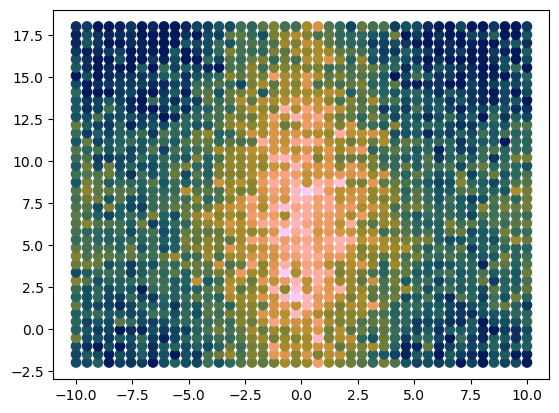

In [19]:


plt.scatter(test_lon, test_lat, c=test_no2, alpha=1, cmap=cmc.batlow, vmin=vmin, vmax=vmax, s=45)
plt.show()

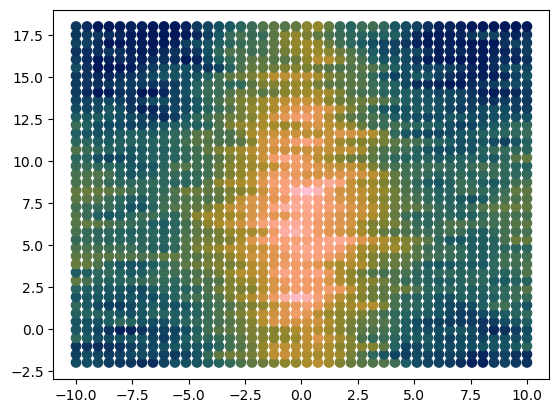

In [18]:
import scipy.ndimage
import matplotlib.pyplot as plt

# Apply Gaussian filter
filtered_no2 = scipy.ndimage.gaussian_filter(test_no2, sigma=1)

# Plot the filtered data
plt.scatter(test_lon, test_lat, c=filtered_no2, alpha=1, cmap=cmc.batlow, vmin=vmin, vmax=vmax, s=45)

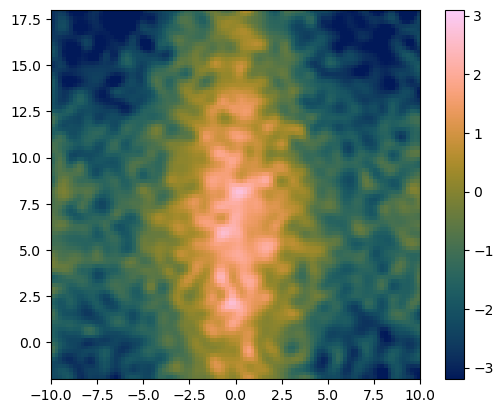

In [46]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create a grid
grid_x, grid_y = np.mgrid[min(test_lon):max(test_lon):100j, min(test_lat):max(test_lat):100j]

# Interpolate the test_no2 values onto the grid
grid_no2 = griddata((test_lon, test_lat), test_no2, (grid_x, grid_y), method='cubic')

# Apply Gaussian filter
filtered_no2 = scipy.ndimage.gaussian_filter(grid_no2, sigma=1)

# Plot the filtered data
plt.imshow(filtered_no2.T, extent=(min(test_lon), max(test_lon), min(test_lat), max(test_lat)), origin='lower', cmap=cmc.batlow, vmin=vmin, vmax=vmax)
plt.colorbar()
#plt.scatter(test_lon, test_lat, c=test_no2, alpha=1, cmap=cmc.batlow, vmin=vmin, vmax=vmax, s=5)
plt.show()

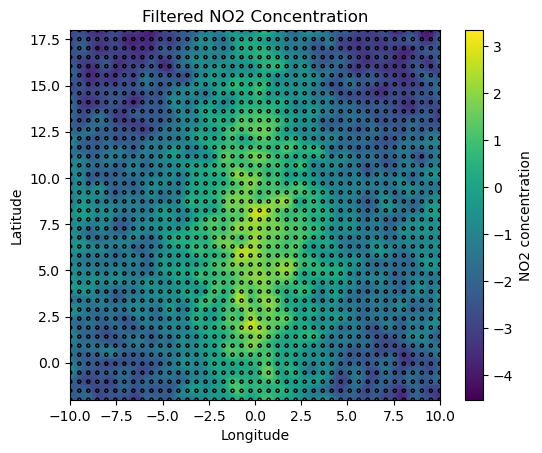

In [27]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Assuming test_lon, test_lat, and test_no2 are your data points
# Create a grid
grid_x, grid_y = np.mgrid[min(test_lon):max(test_lon):100j, min(test_lat):max(test_lat):100j]

# Interpolate the test_no2 values onto the grid
grid_no2 = griddata((test_lon, test_lat), test_no2, (grid_x, grid_y), method='cubic')

# Handle any NaNs in the interpolated grid (optional)
grid_no2 = np.nan_to_num(grid_no2)

# Apply Gaussian filter
filtered_no2 = scipy.ndimage.gaussian_filter(grid_no2, sigma=1)

# Plot the filtered data
plt.imshow(filtered_no2.T, extent=(min(test_lon), max(test_lon), min(test_lat), max(test_lat)), origin='lower', cmap='viridis', vmin=np.min(test_no2), vmax=np.max(test_no2))
plt.colorbar(label='NO2 concentration')
plt.scatter(test_lon, test_lat, c=test_no2, alpha=1, cmap='viridis', vmin=np.min(test_no2), vmax=np.max(test_no2), s=5, edgecolor='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Filtered NO2 Concentration')
plt.show()

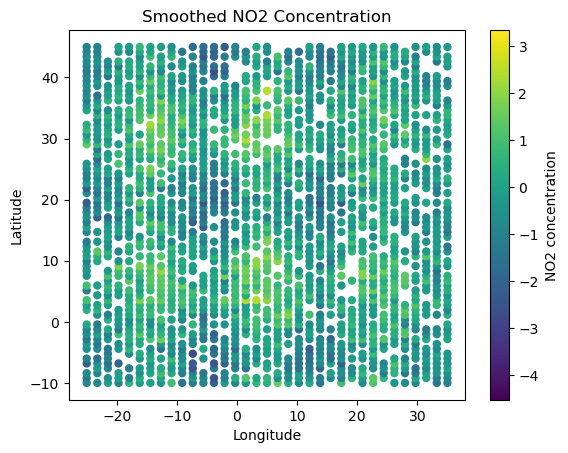

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def gaussian_kernel(distance, sigma=1.0):
    return np.exp(-0.5 * (distance / sigma) ** 2)

def apply_gaussian_convolution(lon, lat, values, sigma=1.0):
    # Calculate pairwise distances
    coords = np.vstack((lon, lat)).T
    distances = cdist(coords, coords, 'euclidean')
    
    # Apply Gaussian kernel
    weights = gaussian_kernel(distances, sigma)
    
    # Convolve values with weights
    smoothed_values = np.dot(weights, values) / np.sum(weights, axis=1)
    
    return smoothed_values

# Apply Gaussian convolution
smoothed_no2 = apply_gaussian_convolution(test2_lon, test2_lat, test2_no2, sigma=0.3)

# Plot the smoothed data
plt.scatter(test2_lon, test2_lat, c=smoothed_no2, alpha=1, cmap='viridis', vmin=np.min(test_no2), vmax=np.max(test_no2), s=25)
plt.colorbar(label='NO2 concentration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Smoothed NO2 Concentration')
plt.show()

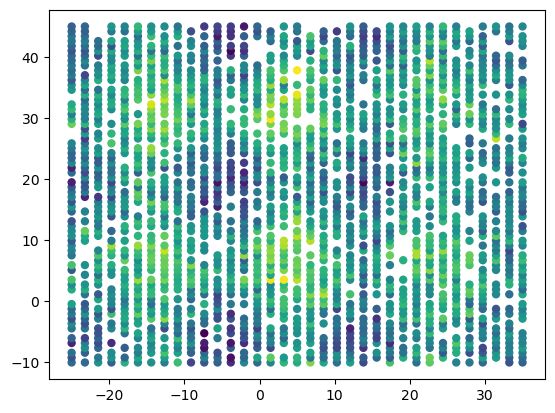

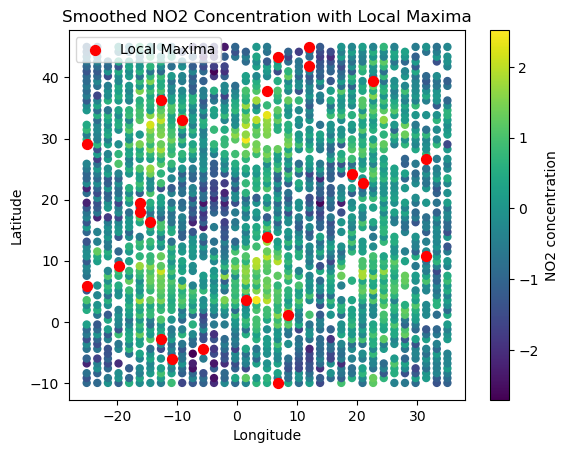

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import maximum_filter

def gaussian_kernel(distance, sigma=1.0):
    return np.exp(-0.5 * (distance / sigma) ** 2)

def apply_gaussian_convolution(lon, lat, values, sigma=1.0):
    # Calculate pairwise distances
    coords = np.vstack((lon, lat)).T
    distances = cdist(coords, coords, 'euclidean')
    
    # Apply Gaussian kernel
    weights = gaussian_kernel(distances, sigma)
    
    # Convolve values with weights
    smoothed_values = np.dot(weights, values) / np.sum(weights, axis=1)
    
    return smoothed_values

def find_local_maxima(data, size=100):
    # Apply a maximum filter to find local maxima
    local_max = maximum_filter(data, size=size) == data
    return local_max

# Apply Gaussian convolution with two different sigmas
smoothed_no2_sigma1 = apply_gaussian_convolution(test2_lon, test2_lat, test2_no2, sigma=0.3)
smoothed_no2_sigma2 = apply_gaussian_convolution(test2_lon, test2_lat, test2_no2, sigma=2)

# Compute the difference of Gaussians
dog = smoothed_no2_sigma1 - smoothed_no2_sigma2

# Find local maxima in the DoG result
local_maxima = find_local_maxima(dog)

# Plot the smoothed data and local maxima
plt.scatter(test2_lon, test2_lat, c=smoothed_no2_sigma1, alpha=1, cmap='viridis', vmin=np.min(test2_no2), vmax=np.max(test2_no2), s=25)
plt.show()

plt.scatter(test2_lon, test2_lat, c=smoothed_no2_sigma1, alpha=1, cmap='viridis', vmin=np.min(test2_no2), vmax=np.max(test2_no2), s=25)
plt.colorbar(label='NO2 concentration')
plt.scatter(test2_lon[local_maxima], test2_lat[local_maxima], c='red', s=50, label='Local Maxima')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Smoothed NO2 Concentration with Local Maxima')
plt.legend()
plt.show()